# <center> The Greatest of All Time: Tennis Analysis</center>
### <center> An exploratory analysis of men professional tennis from 2000 to 2020 </center>

<center><img src="https://img.olympicchannel.com/images/image/private/t_s_w1340/t_s_16_9_g_auto/f_auto/primary/jxaggsn5kr3xsnu6hlqf"</center>


### Welcome everyone,

In this notebook, I wanted to combine two of my passions together: data analysis and tennis. The main purpose is to provide a comprehensive analysis of the last two decades of professional men tennis, allowing the general public (including the less knowledgeable) to become aware of the distinctive traits of a remarkable era. An era that, as the title states, has been dominated by three formidable players: (from left to right) Rafael Nadal, Novak Djokovic, and Roger Federer.


# Aces of the Ages: An In-Depth Analysis of Men's Professional Tennis

In this analysis, I weave together two of my passions: Data and the dynamic world of professional tennis. I aim to present a comprehensive review of two decades in the men's professional tennis circuit—an era indelibly marked by the towering presence of three extraordinary athletes: Rafael Nadal, Novak Djokovic, and Roger Federer. All resources were retrieved from https://www.ultimatetennisstatistics.com/, a statistical website that contains various data and insights related to professional tennis matches and players. This website offers comprehensive information on player rankings, head-to-head records, match results, and various statistical metrics used to analyse player performance in tennis. It is a valuable resource for tennis enthusiasts, analysts, and researchers looking to delve into the world of tennis statistics and gain a deeper understanding of the sport.

Our quest is to unveil the Greatest Of All Time (GOAT) among this formidable trio. To embark on this journey, we delve into a range of metrics, each offering a unique perspective on their prowess and consistency:

1. **Total Number of Wins:** The most fundamental yardstick—how many matches has each player won?

2. **Total Number of Tournament Victories:** Beyond individual matches, how many tournaments have they conquered?

3. **Grand Slam Victories:** The glory of victory is brightest at the Grand Slam tournaments. How many have they each claimed?

4. **Winning Percentage on Different Surfaces:** From the clay courts of Roland Garros to the grass of Wimbledon, how have they adapted to varying challenges?

5. **Head-to-Head Victories:** How do these titans measure up in direct combat? Their personal rivalries are legends in their own right.

6. **Longest Reign at World Number 1:** Dominance over time speaks volumes of consistency and mental fortitude.

7. **Victories Against Top 10 Players:** How do our contenders fare when the competition is toughest?

8. **Performance in Best of 5 Sets in Majors:** Stamina, strategy, skill—all are put to the ultimate test here.

9. **Longest Winning Streak or Best Year:** At their peak, how invincible were they?

It's important to note that our data spans from 2000 to 2023 and does not include 2023's significant events, such as Djokovic's 24th victory in London. As we navigate this voyage into the numbers behind the legends, these omissions are worth keeping in mind.

Prepare for an exciting rally through the annals of tennis history, where each statistic and every insight adds another stroke to our portrait of the tennis titans: Rafael Nadal, Novak Djokovic, and Roger Federer. Let's serve up some data!

---
I hope you find this version engaging.

### <a id='section1'>1. Libraries required to run the analysis</a>

In [844]:
# Importing libraries required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from pywaffle import Waffle
import re
import math
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib
%matplotlib inline 
# %matplotlib notebook
plt.rcParams["figure.facecolor"] = "#d0e0e3"

# icons dict converts to correct utf-8 code:
from matplotlib.patches import Patch

### <a id='section2'>2. Data Loading and cleaning</a>



In [845]:
# Load Federer data from file
federer_data = pd.read_csv('./file/Roger.csv')
federer_data['Name'] = 'Federer'

# Load Nadal data from file
nadal_data = pd.read_csv("./file/Rafa.csv")
nadal_data['Name'] = 'Nadal'

# Load Djokovic data from file
djokovic_data = pd.read_csv('./file/Novak.csv')
djokovic_data['Name'] = 'Djokovic'

# level column categorised by the level of the professional ATP tournament
# Define the mapping dictionary
mapping = {'G': 'Major',
           'A': 'ATP 500',
           'B': 'ATP 250',
           'F': 'ATP Finals',
           'M': 'ATP Masters 1000',
           'D': 'Davis Cup',
           'O': 'Olympics',
           'T': 'ATP Cup'}

# level column categorised by the level of the professional ATP tournament
# Define the mapping dictionary
mapping2 = {'H': 'Hard',
           'C': 'Clay',
           'G': 'Grass',
           'P': 'Carpet'}

def replace_values(data, column, mapping):
    data[column] = data[column].replace(mapping)

# Replace the values using the mapping dictionary
replace_values(federer_data, 'level', mapping)
replace_values(nadal_data, 'level', mapping)
replace_values(djokovic_data, 'level', mapping)

# Replace the values using the mapping dictionary
replace_values(federer_data, 'surface', mapping2)
replace_values(nadal_data, 'surface', mapping2)
replace_values(djokovic_data, 'surface', mapping2)




# Concat all data
all_data = pd.concat([federer_data,nadal_data,djokovic_data])# Concat all data
# Dropping unnecessary columns
all_data = all_data.drop(columns = ['winner_country_name', 'winner_country_id', 'loser_country_name',
                                    'loser_country_id'])

### <a id='section3'>3. Exploratory analysis</a>

Primarily thanks to Ultimate Tennis Statistics, we have our data ready for our exploratory analysis. We maybe do some further modifications later, but we are definitely in good shape to start. 

Further explanation on ATP Ranking System:

- ATP ranking points are the fundamental scoring metric used to gauge the performance levels of professional tennis players.
- Points are earned based on tournament performance, with higher points awarded for more prestigious tournaments.
- Advancing to later rounds in tournaments contributes to a player's point tally.
- Points earned in matches increase as players progress to later stages of a tournament.
- ATP ranking points determine a player's seeding in tournaments.
- Higher rankings result in higher seedings, often allowing players to skip the early rounds of tournaments.
- ATP ranking points also influence players' eligibility for entry into prestigious tennis events.
- Higher-ranked players may receive direct entry into these tournaments without having to go through qualifying rounds.
- Players must defend their rankings by participating in the same tournaments annually.
- Points earned from a tournament decrease after 52 weeks, so players need to accumulate new points to maintain or improve their rankings.
- ATP ranking points not only measure a player's standing but also open doors to better opportunities within the sport.



#### <a id='section3.1'>3.1 Tourney level</a>

For those who already did not know, in the ATP (Association of Tennis Professionals) tennis tournaments there are different categories. We turn briefly to explain and explore them before moving forward:

- **Grand Slam** tournaments are the highest rank tournaments. The winner receives 2,000 points in the ATP standings. There are only 4 such tournaments yearly: the Australian Open, Roland Garros, Wimbledon, and the US Open.


- **ATP World Tour Finals** At the end of the season, is the tournament that faces the first 8 players of the year in both the singles and doubles. The winner of this tournament receives 1500 points in the standings if undefeated.


- **Masters 1000** tournaments are the next category in terms of prestige. The winner is rewarded with a reasonable 1,000 points. Masters tournaments are 9 in number: Cincinnati, Indian Wells, Madrid, Miami, Monte-Carlo, Montreal, Paris, Rome, and Shanghai.


- The **ATP 500** point category is the next tournament category. As the name suggests, the winner of such a tournament is rewarded with 500 points in the ATP standings.


- The **ATP 250** point tournaments represent the lowest tier of Men's Professional Tennis tournament category, the winner of such a tournament is rewarded with 250 points in the ATP standings





Note: *The Davies cup is an international team event in men's tennis which is run by the International Tennis Federation (ITF), so we will disregard its analysis as it consists of Double and Single Matches.*

Let us see how these categories are recorded in our dataset:

Alright, they are represented as abbreviations. So we need further analysis to make sure that a certain abbreviation relates to the correct tournament category. For doing so, I will exploit my sectorial knowledge, understanding that Wimbledon is a Grand Slam, I can subset the data, and verify the corresponding abbreviation.

In [846]:
# The grand slams are categorized as Major in tourney_level
filtered_data = all_data[all_data['tournament'].isin(['Wimbledon', 'Roland Garros', 'Australian Open', 'US Open'])]
#filtered_data.head()

In [847]:
# The ATP500 are categorized as A in tourney_level
filtered_data = all_data[all_data['level'] == 'ATP 500']
#filtered_data.head()

In [848]:
# The ATP500 are categorized as A in tourney_level
filtered_data = all_data[all_data['level'] == 'ATP 250']
#filtered_data.head()

In [849]:

# All right, they are the ATP World Tour finals.
# They were named differently in 2009:
filtered_data = all_data[all_data['tournament'].isin(['Masters Cup', 'Tour Finals'])]
#filtered_data.head()

<ipython-input-850-d22e742f9646>:73: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  markerline, stemline, baseline = ax.stem(tl_sub_x, levels, use_line_collection=True)
<ipython-input-850-d22e742f9646>:84: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  markerline, stemline, baseline = ax.stem(tl_x, levels1, use_line_collection=True)


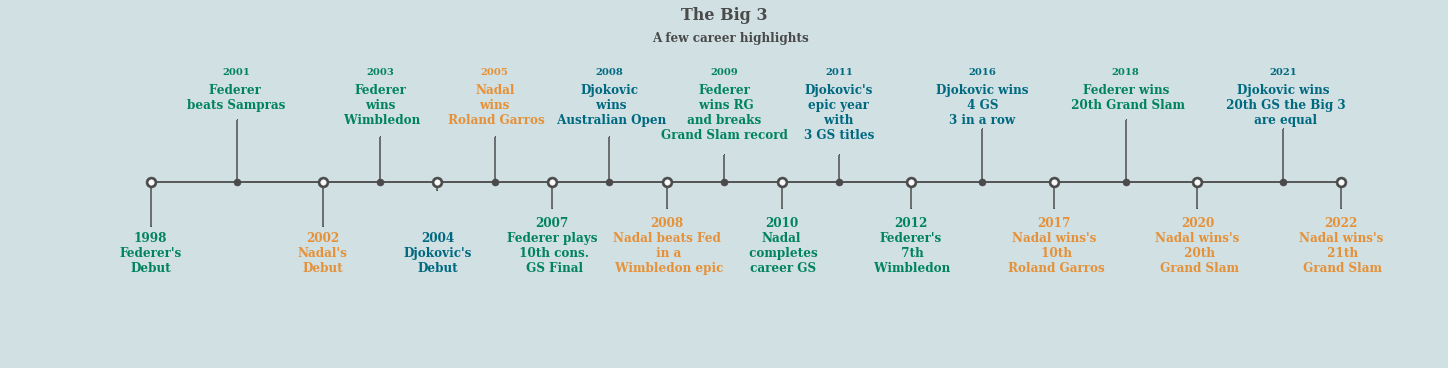

In [850]:


# Change default font to 'serif'
mpl.rcParams['font.family'] = 'serif'

color_pallete = {'WB':'#028360','US':'#006980','RG':'#e69138', 'AO':'#3d85c6'}
color_pallete_players = {'Federer':'#028360','Djokovic':'#006980','Nadal':'#e69138', 'AO':'#3d85c6'}

background_color = '#d0e0e3'

f_c =color_pallete_players['Federer']
n_c = color_pallete_players['Nadal']
d_c = color_pallete_players['Djokovic']

tl_dates = [
    "1998\nFederer's\nDebut",
    "2002\nNadal's\nDebut",
    "2004\nDjokovic's\nDebut",
    "2007\nFederer plays\n 10th cons.\n GS Final",
    "2008\nNadal beats Fed\n in a\n Wimbledon epic",
    "2010\nNadal\n completes\n career GS",
    "2012\nFederer's\n 7th\n Wimbledon",
    "2017\nNadal wins's\n 10th\n Roland Garros",
    "2020\nNadal wins's\n 20th\n Grand Slam",
    "2022\nNadal wins's\n 21th\n Grand Slam"]

tl_dates_color = [f_c,n_c,d_c,f_c,n_c,f_c,f_c,n_c,n_c,n_c]
tl_x = [1, 2.2, 3, 3.8, 4.6, 5.4,6.3,7.3,8.3,9.3]

tl_sub_x = [1.6, 2.6, 3.4, 4.2, 5.0, 5.8,6.8,7.8,8.9]
tl_sub_times = [
    "2001","2003","2005","2008","2009","2011", "2016", "2018","2021"]
tl_text = [
    "Federer \nbeats Sampras",
    "Federer\nwins\n Wimbledon", "Nadal\nwins\n Roland Garros",
    "Djokovic\n wins\n Australian Open","Federer\n wins RG\n and breaks \nGrand Slam record",
        "Djokovic's\nepic year\n with \n3 GS titles",
        "Djokovic wins\n 4 GS \n3 in a row",
        "Federer wins\n 20th Grand Slam",
        "Djokovic wins\n 20th GS the Big 3\n are equal"]

tl_text_color = [f_c,f_c,n_c,d_c,f_c,d_c,d_c,f_c,d_c]

# Set figure & Axes
fig, ax = plt.subplots(figsize=(20, 5), constrained_layout=True)
ax.set_ylim(-2, 1.75)
ax.set_xlim(0, 10)

# Timeline : line
ax.axhline(0, xmin=0.1, xmax=0.93, c='#4a4a4a', zorder=1)

# Timeline : Date Points
ax.scatter(tl_x, np.zeros(len(tl_x)), s=120, c='#4a4a4a', zorder=2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s=30, c='#fafafa', zorder=3)
# Timeline : Time Points
ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s=50, c='#4a4a4a',zorder=4)

# Date Text
for x, date, color in zip(tl_x, tl_dates, tl_dates_color):
    ax.text(x, -1, date, ha='center', 
            fontweight='bold',
            color=color,fontsize=12)

# Stemplot : vertical line
levels = np.zeros(len(tl_sub_x))   
levels[:] = 0.3
levels[0] = 0.7
levels[1] = 0.5
levels[2] = 0.5
levels[3] = 0.5
levels[6] = 0.6
levels[7] = 0.7
levels[8] = 0.6

markerline, stemline, baseline = ax.stem(tl_sub_x, levels, use_line_collection=True)    
plt.setp(baseline, zorder=0)
plt.setp(markerline, marker=',', color='#4a4a4a')
plt.setp(stemline, color='#4a4a4a')

levels1 = np.zeros(len(tl_x))   
levels1[:] = -0.3
levels1[0] = -0.5
levels1[1] = -0.5
levels1[2] = -0.1

markerline, stemline, baseline = ax.stem(tl_x, levels1, use_line_collection=True)    
plt.setp(baseline, zorder=0)
plt.setp(markerline, marker=',', color='#4a4a4a')
plt.setp(stemline, color='#4a4a4a')

# Text
for idx, x, time, txt, color in zip(range(1, len(tl_sub_x)+1), tl_sub_x, tl_sub_times, tl_text,tl_text_color):
    ax.text(x, 1.2, time, ha='center', 
            fontweight='bold',
            color = color,
            fontsize=10)
    
    ax.text(x, 1.1, txt, va='top', ha='center',  fontweight='bold',
        color = color ,
        fontsize=12)

# Spine
for spine in ["left", "top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

plt.rcParams['axes.facecolor']='#d0e0e3'

# Ticks    
ax.set_xticks([]) 
ax.set_yticks([]) 

fig.set_facecolor('#d0e0e3')
ax.set_facecolor('#d0e0e3')

# Title
ax.set_title("The Big 3", fontweight="bold", fontsize=16, color='#4a4a4a')
ax.text(4.5,1.57,"A few career highlights",fontweight="bold", fontsize=12, color='#4a4a4a')

plt.show()


## 1. **Total number of wins**: The simplest metric, just compare the total number of matches each player has won. 


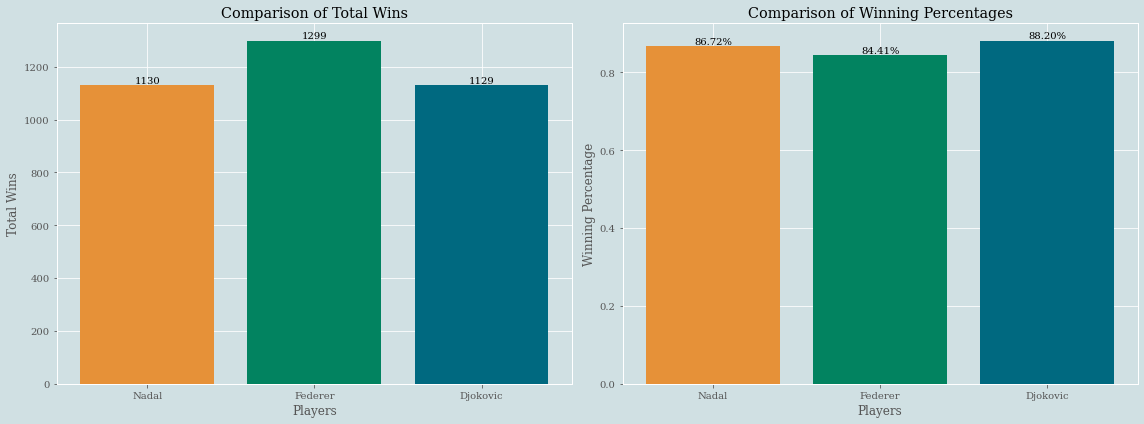

In [851]:
# Total number of wins
nadal_wins = all_data[all_data['winner_name'] == 'Rafael Nadal'].shape[0]
federer_wins = all_data[all_data['winner_name'] == 'Roger Federer'].shape[0]
djokovic_wins = all_data[all_data['winner_name'] == 'Novak Djokovic'].shape[0]

# Total number of matches
nadal_matches = nadal_data.shape[0]
federer_matches = federer_data.shape[0]
djokovic_matches = djokovic_data.shape[0]

# Winning percentage
nadal_percentage = nadal_wins / nadal_matches
federer_percentage = federer_wins / federer_matches
djokovic_percentage = djokovic_wins / djokovic_matches

# Data for total wins and winning percentages
players = ['Nadal', 'Federer', 'Djokovic']
total_wins = [nadal_wins, federer_wins, djokovic_wins]
winning_percentages = [nadal_percentage, federer_percentage, djokovic_percentage]
colors = ['#e69138', '#028360', '#006980']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plotting total wins
bars1 = ax1.bar(players, total_wins, color=colors)
ax1.set_xlabel('Players')
ax1.set_ylabel('Total Wins')
ax1.set_title('Comparison of Total Wins')

# Add data labels to total wins plot
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

# Plotting winning percentages
bars2 = ax2.bar(players, winning_percentages, color=colors)
ax.grid(True)

ax2.set_xlabel('Players')
ax2.set_ylabel('Winning Percentage')
ax2.set_title('Comparison of Winning Percentages')
    
# Add data labels to winning percentages plot
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2%}', ha='center', va='bottom')


# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


The provided code generates a comparison graph in the form of two subplots: one for total wins and another for winning percentages. Let's analyze the graph:

## Total Wins Comparison:
The left subplot shows a bar chart comparing the total wins of three tennis players: Rafael Nadal, Roger Federer, and Novak Djokovic. Each player is represented by a colored bar, and the height of the bar represents the total number of wins. The x-axis represents the players (Nadal, Federer, Djokovic), and the y-axis represents the total wins. Above each bar, the exact count of wins for each player is displayed as a data label.

## Winning Percentages Comparison:
The right subplot displays a bar chart comparing the winning percentages of the three players. Again, each player is represented by a colored bar, and the height of the bar represents the winning percentage. The x-axis represents the players (Nadal, Federer, Djokovic), and the y-axis represents the winning percentage. Above each bar, the exact winning percentage is displayed as a data label.

Overall, this graph provides a visual comparison of the total wins and winning percentages of Rafael Nadal, Roger Federer, and Novak Djokovic. It allows for an easy interpretation of their achievements, with data labels providing precise values for better understanding.

## 2. **Total number of tournament victories**: Count the number of tournaments each player has won.


In [852]:
# Group by 'tournament' and 'level' and count titles for each player
nadal_tournament_level_wins = nadal_data[(nadal_data['round'] == 'F') & (nadal_data['winner_name'] == 'Rafael Nadal')].groupby(['tournament', 'level']).size()
federer_tournament_level_wins = federer_data[(federer_data['round'] == 'F') & (federer_data['winner_name'] == 'Roger Federer')].groupby(['tournament', 'level']).size()
djokovic_tournament_level_wins = djokovic_data[(djokovic_data['round'] == 'F') & (djokovic_data['winner_name'] == 'Novak Djokovic')].groupby(['tournament', 'level']).size()


ATP 250

In [853]:
# List of dataframes and player names
dataframes = [nadal_tournament_level_wins, federer_tournament_level_wins, djokovic_tournament_level_wins]
names = ['Nadal', 'Federer', 'Djokovic']

# Dictionary to store the final sorted dataframes
sorted_dataframes = {}

# Loop through the dataframes
for df, name in zip(dataframes, names):
    # Reset index
    df_reset = df.reset_index()
    # Sort by 'level'
    df_sorted = df_reset.sort_values(by='level')
    # Set 'tournament' and 'level' back as index
    df_final = df_sorted.set_index(['level', 'tournament'])
    # Store in the dictionary
    sorted_dataframes[name] = df_final

# Now you can access the sorted dataframes like this:
nadal_sorted_df = sorted_dataframes['Nadal']
federer_sorted_df = sorted_dataframes['Federer']
djokovic_sorted_df = sorted_dataframes['Djokovic']


#List of total ATP250 events
nadal_atp_250 = nadal_sorted_df.loc['ATP 250']
federer_atp_250 = federer_sorted_df.loc['ATP 250']
djokovic_atp_250 = djokovic_sorted_df.loc['ATP 250']


#concat the files 
Total250Titles = pd.concat([federer_atp_250, nadal_atp_250, djokovic_atp_250], axis=1)

#add Table Title
Total250Titles.columns = ['Roger Federer', 'Rafael Nadal', 'Novak Djokovic']


Total250Titles = Total250Titles.fillna(0)

# Convert to integers (since number of titles cannot be fractional)
Total250Titles = Total250Titles.astype(int)

# Calculate total ATP 250 titles for each player and append as a new row
total_titles = Total250Titles.sum()
Total250Titles.loc['Total'] = total_titles

# Print the dataframe
Total250Titles


,Roger Federer,Rafael Nadal,Novak Djokovic
tournament,,,
Gstaad,1,0,0
Marseille,1,0,0
Istanbul,1,0,0
Halle,7,0,0
Milan,1,0,0
Estoril,1,0,1
Doha,3,1,2
Munich,1,0,0
Stuttgart,1,1,0


# ATP 250 Titles Analysis

The above python code provides a methodical way to analyze the performance of the top three tennis players - Rafael Nadal, Roger Federer, and Novak Djokovic - in ATP 250 level tournaments. Here's a step-by-step explanation and analysis of the code.

First, the code receives data on tournament wins for each player in individual DataFrames and creates a list of these DataFrames along with the corresponding player names.

Subsequently, for each DataFrame, it resets the index, sorts the DataFrame by tournament 'level' (in this case, ATP 250), and then re-establishes 'level' and 'tournament' as the index. The final sorted DataFrames are stored in a dictionary for easy access.

Next, it slices the data for ATP 250 level tournaments for each player, creating sub-DataFrames for each.

The DataFrames for ATP 250 level tournaments are then concatenated along the columns axis (`axis=1`). This results in a single DataFrame where each column corresponds to one of the three players, and each row corresponds to an ATP 250 level tournament. The DataFrame's cells thus represent the number of titles each player has won in the corresponding tournament.

The columns are renamed to player names for clarity, and any NaN values (which might occur if a player didn't participate or win a title in a specific tournament) are filled with 0.

Subsequently, the DataFrame is cast to integer data type because the number of titles won cannot be a fraction.

The sum function is then used to calculate the total number of ATP 250 titles each player has won. This total is appended as a new row to the DataFrame.

The final DataFrame, `Total250Titles`, thus provides a detailed comparison of the performance of the three players at ATP 250 level tournaments. Each column represents a player, and each row represents a tournament (with the last row showing the total number of ATP 250 titles won).

In conclusion, this analysis offers a deep dive into the performance of the three players at the ATP 250 level. It not only shows the number of titles each player has won in individual tournaments but also provides a comparative picture by showing the total number of ATP 250 titles won by each player. This can provide valuable insights into the players' performances and their relative strengths in ATP 250 tournaments.

In [854]:
#List of total ATP250 events
nadal_atp_500 = nadal_sorted_df.loc['ATP 500']
federer_atp_500 = federer_sorted_df.loc['ATP 500']
djokovic_atp_500 = djokovic_sorted_df.loc['ATP 500']

Total500Titles = pd.concat([federer_atp_500, nadal_atp_500, djokovic_atp_500], axis=1)
Total500Titles.columns = ['Roger Federer', 'Rafael Nadal', 'Novak Djokovic']

Total500Titles = Total500Titles.fillna(0)

# Convert to integers (since number of titles cannot be fractional)
Total500Titles = Total500Titles.astype(int)

# Calculate total ATP 500 titles for each player and append as a new row
total_titles = Total500Titles.sum()
Total500Titles.loc['Total'] = total_titles

# Print the dataframe
Total500Titles

,Roger Federer,Rafael Nadal,Novak Djokovic
tournament,,,
Dubai,8,1,5
Basel,7,0,1
Halle,3,0,0
Tokyo,1,1,1
Vienna,2,0,1
Rotterdam,3,0,0
Acapulco,0,4,0
Stuttgart,0,2,0
Rio de Janeiro,0,1,0


# ATP 500 Analysis

The python code presented above performs an analysis of the top three tennis players - Rafael Nadal, Roger Federer, and Novak Djokovic - in ATP 500 level tournaments. Here's the detailed walkthrough and analysis of the code.

Initially, the code takes in data about the wins of each player in ATP 500 level tournaments from the sorted DataFrames created earlier. 

Then it concatenates these DataFrames along the columns axis (`axis=1`) to create a unified DataFrame `Total500Titles` where each column corresponds to one player, and each row represents a different ATP 500 level tournament. The values in the DataFrame thus represent the number of titles each player has won in the corresponding tournament.

The columns are then appropriately renamed to player names for clarity, and any NaN values (which might appear if a player didn't participate or win a title in a specific tournament) are replaced with 0.

After that, the DataFrame is converted to an integer data type since the number of titles won cannot be a fractional value.

Subsequently, the total number of ATP 500 titles won by each player is calculated using the sum function, and this total is added as a new row to the DataFrame.

The final DataFrame, `Total500Titles`, gives a detailed comparison of the performance of the three players in ATP 500 level tournaments. Each column represents a player, and each row corresponds to a tournament (with the last row showing the total number of ATP 500 titles won).

In conclusion, this analysis provides a comprehensive understanding of the performance of these three players at the ATP 500 level. It displays the number of titles each player has won in individual tournaments and also provides a comparative picture by showcasing the total number of ATP 500 titles won by each player. This could offer valuable insights into the players' performances and their comparative strengths at ATP 500 tournaments.

2.1 **Total number of tournament victories**: they all have a lot of titles lets focus on the most pretgious events such as the majors and the 9 masters tournaments atp finals and olympics.

In [855]:
# Join the dataframes on the shared 'tournament' and 'level' index
total_titles_df = pd.concat([nadal_sorted_df, federer_sorted_df, djokovic_sorted_df], axis=1)

# Rename the columns to represent the respective players
total_titles_df.columns = ['Nadal', 'Federer', 'Djokovic']

# Replace NaN values with 0 (representing tournaments where a player did not participate )
total_titles_df = total_titles_df.fillna(0)

# Convert to integers (since number of titles cannot be fractional)
total_titles_df = total_titles_df.astype(int)

# Calculate total titles won by each player
total_titles = total_titles_df.sum()


# List of tournament levels you want to select
desired_levels = ['Major', 'ATP Finals', 'Olympics', 'ATP Masters 1000']

# Select only rows where the level is in the desired list
selected_tournaments_df = total_titles_df.loc[total_titles_df.index.get_level_values('level').isin(desired_levels)]

# Print the selected dataframe
selected_tournaments_df




Nadal  Federer  Djokovic
level            tournament                                    
ATP Finals       Masters Cup               0        4         1
                 Tour Finals               0        2         5
ATP Masters 1000 Canada Masters            5        2         4
                 Cincinnati Masters        1        7         2
                 Hamburg Masters           1        4         0
                 Indian Wells Masters      3        5         5
                 Madrid Masters            5        3         3
                 Miami Masters             0        4         6
                 Monte Carlo Masters      11        0         2
                 Paris Masters             0        1         6
                 Rome Masters             10        0         6
                 Shanghai Masters          0        2         4
Major            Australian Open           2        6        10
                 Roland Garros            14        1         3
                 US Open                   4        5         3
                 Wimbledon                 2        8         7
Olympics         Beijing Olympics          1        0         0

The "Big Three" in men's tennis, namely Rafael Nadal, Roger Federer, and Novak Djokovic, are widely recognized for their significant accomplishments in the sport, especially in Grand Slam tournaments, ATP Tour Finals, the Olympics, and ATP Masters 1000 events. 

## Grand Slam Tournaments

These are the four most prestigious annual tennis events and include the Australian Open, French Open (Roland Garros), Wimbledon, and the US Open. Grand Slam victories: These are the most prestigious tournaments, and thus, winning these tournaments is often considered a significant achievement. Count the victories in these tournaments for each player.

- Roger Federer has won 20 Grand Slam titles.
- Rafael Nadal also has 22 Grand Slam titles, with a record 13 titles at the French Open.
- Novak Djokovic has won 23 Grand Slam titles as well.

## ATP Tour Finals

The ATP Tour Finals, formerly known as the ATP World Tour Finals, is the second highest tier of annual men's tennis tournaments after the four Grand Slam tournaments.

- Federer leads this category with 6 titles.
- Djokovic also has 6 titles in this category.
- Nadal, however, has never won the ATP Tour Finals.

## Olympics

The Olympics is not part of the annual tennis calendar but is a prestigious event that occurs every four years.

- Nadal and Federer each have a gold medal in singles from the 2008 and 2012(doubles) Olympics, respectively.
- Djokovic,  has not won a gold medal in singles, though he did win a bronze medal in 2008.

## ATP Masters 1000

The ATP Masters 1000 tournaments are the third highest tier of annual men's tennis competition.

- Djokovic holds the record with 36 Masters 1000 titles as of September 2021.
- Nadal is just behind with 35 titles.
- Federer has 28 titles in this category.

In summary, these three players have dominated the sport for well over a decade, setting records and frequently occupying the top three positions in the world rankings. They are regarded as some of the greatest players in the history of tennis due to their consistent performances, talent, and the number of titles they have won across different events.


<Figure size 3600x3960 with 0 Axes>

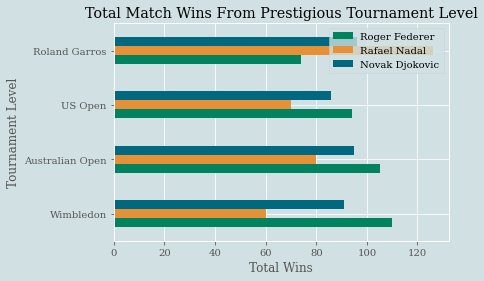

,Roger Federer,Rafael Nadal,Novak Djokovic
Wimbledon,110,60,91
Australian Open,105,80,95
US Open,94,70,86
Roland Garros,74,126,96


In [856]:
# Filter the tournament levels
allowed_levels = ['Australian Open', 'Roland Garros', 'Wimbledon','US Open']
RogerFiltered_data = RogerFiltered_data[RogerFiltered_data['tournament'].isin(allowed_levels)]
NadalFiltered_data = NadalFiltered_data[NadalFiltered_data['tournament'].isin(allowed_levels)]
NovakFiltered_data = NovakFiltered_data[NovakFiltered_data['tournament'].isin(allowed_levels)]

# Count the number of wins based on the player and level
RogerWins = RogerFiltered_data['tournament'].value_counts()
NadalWins = NadalFiltered_data['tournament'].value_counts()
NovakWins = NovakFiltered_data['tournament'].value_counts()

# Merge the data
win_counts = pd.concat([RogerWins, NadalWins, NovakWins], axis=1)
win_counts.columns = ['Roger Federer', 'Rafael Nadal', 'Novak Djokovic']

# Create a sideways bar plot with different colors for each player
plt.figure(figsize=(50, 55))  # Increase the figure size
win_counts.plot(kind='barh', color=['#028360', '#e69138', '#006980'])
plt.xlabel('Total Wins')
plt.ylabel('Tournament Level')
plt.title('Total Match Wins From Prestigious Tournament Level')
plt.legend()
plt.show()

# Apply styling to the table
styled_table = win_counts.style.background_gradient(cmap='Blues', axis=0)

ax.grid(True)

# Display the styled table
styled_table


# Analysis

The code provided above is performing an analysis on the tournament victories of the "Big Three" of men's tennis – Roger Federer, Rafael Nadal, and Novak Djokovic. The analysis specifically focuses on their wins in the four prestigious Grand Slam tournaments: Australian Open, Roland Garros (French Open), Wimbledon, and the US Open. Here is a step-by-step interpretation and analysis of the code:

Initially, the data for each player is filtered to include only those tournaments that are listed in the `allowed_levels` list, which are the four Grand Slam tournaments.

Afterwards, the `value_counts()` function is used to tally the number of wins each player has in each of these tournaments. This results in a Series object for each player, where the index is the tournament name and the value is the number of wins in that tournament.

The three Series objects are then concatenated into one DataFrame along the columns axis (`axis=1`). This results in a DataFrame where each column corresponds to one player and each row corresponds to one of the Grand Slam tournaments. The cell values represent the number of victories that player has had in that tournament.

Next, the code creates a horizontal bar plot visualizing this data, with each player represented by a different color. The size of the plot is adjusted for clarity. The x-axis represents the total wins, the y-axis shows the tournament level, and a legend is included to identify the players. This visualization provides a clear comparative view of the number of victories each player has had in each of the Grand Slam tournaments.

Finally, the DataFrame is displayed as a styled table, with the cell color intensity varying based on the number of wins. This provides another way to visually compare the victories of the three players across the Grand Slam tournaments.

In summary, this analysis provides a detailed comparison of the performance of the three players in the most prestigious tournaments in tennis. It showcases not only the number of victories each player has had in individual Grand Slam tournaments, but also provides a clear comparative picture by displaying this data in both a bar plot and a styled table. These insights can help understand the dominance and strengths of each player in different Grand Slam tournaments.

# Wins across different surfaces
The winning percentage on various surfaces reflects the ratio of matches won to the total matches played on each type of surface. This metric is a valuable indicator of a player's consistency, as it takes into account not just victories, but also the frequency of matches played.

In [857]:
# Filter matches won by Federer
federer_wins = federer_data[federer_data['winner_name'] == 'Roger Federer']
# Count the number of matches played on each surface
total_matches_federer = federer_data['surface'].value_counts()
# Count the number of matches won on each surface
wins_on_surface_federer = federer_wins['surface'].value_counts()

# Calculate the winning percentage on each surface
Federerwinning_percentage = wins_on_surface_federer / total_matches_federer


# Filter matches won by Nadal
nadal_wins = nadal_data[nadal_data['winner_name'] == 'Rafael Nadal']
# Count the number of matches played on each surface
total_matches_nadal = nadal_data['surface'].value_counts()
# Count the number of matches won on each surface
wins_on_surface_nadal = nadal_wins['surface'].value_counts()

# Calculate the winning percentage on each surface
Nadalwinning_percentage = wins_on_surface_nadal / total_matches_nadal
# Print the winning percentage


# Filter matches won by Djokovic
djokovic_wins = djokovic_data[djokovic_data['winner_name'] == 'Novak Djokovic']
# Count the number of matches played on each surface
total_matches_djokovic = djokovic_data['surface'].value_counts()
# Count the number of matches won on each surface
wins_on_surface_djokovic = djokovic_wins['surface'].value_counts()

# Calculate the winning percentage on each surface
Djokovicwinning_percentage = wins_on_surface_djokovic  / total_matches_djokovic 



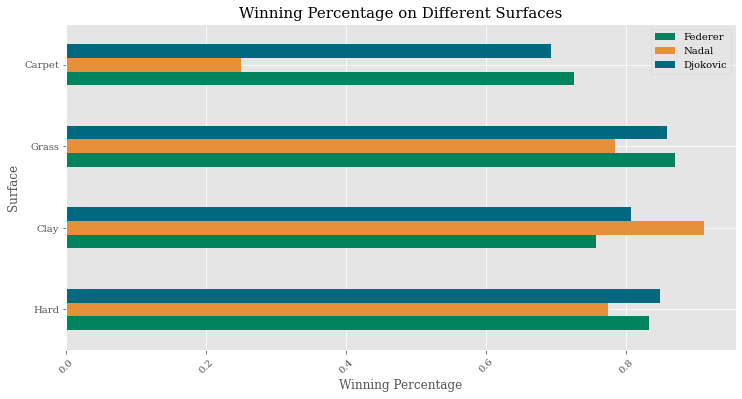

In [858]:
# Create a dataframe to hold the winning percentages
data = {'Federer': Federerwinning_percentage, 
        'Nadal': Nadalwinning_percentage, 
        'Djokovic': Djokovicwinning_percentage}

winning_percentage_df = pd.DataFrame(data)

# Create a style
plt.style.use('ggplot')

# Create the bar chart
ax = winning_percentage_df.plot(kind='barh',color=['#028360', '#e69138', '#006980'], figsize=(12,6))

# Add title and labels
ax.set_title('Winning Percentage on Different Surfaces', fontsize=15)
ax.set_xlabel('Winning Percentage', fontsize=12)
ax.set_ylabel('Surface', fontsize=12)


# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid
ax.grid(True)

# Show the chart
plt.show()


# Player Performance and Court Surface Analysis

Each player of the 'Big Three' shows dominant performance on a specific surface. Nadal thrives on clay courts, Federer on grass, and Djokovic on hard courts. Despite Federer's lower victories on grass, this is largely due to fewer tournaments being held on grass. The ATP discontinued the use of the carpet surface, due to its high speed of play and higher injury risk, contributing to the relatively fewer victories on this surface.

# Rafael Nadal and Indoor Hard Courts

Nadal's performance on indoor hard courts is slightly less dominant compared to Federer and Djokovic. His physically intense playing style, characterized by heavy topspin strokes, finds the best application on high-bouncing, slow courts like clay. The lower bounce and faster game of indoor hard courts are less compatible with his style, explaining his lower winning percentage on these courts.

# Federer's Long Career: A Factor to Consider

While discussing the greatest tennis player, it's vital to account for the different career spans. Federer turned pro in 1998, before Nadal and Djokovic, allowing him more opportunities to accumulate victories. Consequently, this could skew the raw numbers comparison, making the winning percentage a less reliable lone metric in the 'Greatest of All Time' debate.

The debate needs to factor in multiple elements - Grand Slam titles, Masters 1000 wins, ATP Finals wins, Olympic medals, head-to-head records, weeks at world number one, and year-end number one finishes. Personal playing style, influence on the sport, and sportsmanship also play crucial roles in this discussion.

Our next analysis will look into head-to-head victories between these players, exploring not just overall win-loss records but also performance on different surfaces. This examination will contribute to a more nuanced understanding of their individual strengths, further enriching the ongoing debate about the true tennis GOAT.

# Head to head against top 10 players 

In [859]:
# Filter for matches where the big 3 played against top 10 ranked players
big_3_names = ["Roger Federer", "Rafael Nadal", "Novak Djokovic"]
top_10_performance = all_data[(all_data['loser_name'].isin(big_3_names)) | (all_data['winner_name'].isin(big_3_names)) & (all_data['loser_rank'] <= 10)].copy()

# Function to determine if the match was a win or loss for the big 3 player
def win_lose(row):
    if row['winner_name'] in big_3_names:
        return 1
    else:
        return 0

# Add columns for 'Player' and 'Win_Lose'
top_10_performance['Player'] = top_10_performance.apply(lambda row: row['winner_name'] if row['winner_name'] in big_3_names else row['loser_name'], axis=1)
top_10_performance['Win_Lose'] = top_10_performance.apply(win_lose, axis=1)

# Group by 'Player', 'loser_rank', and 'Win_Lose' and count the results
top_10_performance = top_10_performance.groupby(by = ['Player', 'loser_rank', 'Win_Lose'])['winner_name'].count().reset_index(name='Result')

# Calculate total matches against each rank
all_top_10_matches = top_10_performance.groupby(by = ['Player', 'loser_rank'])['Result'].sum().reset_index(name='Total')

# Calculate win counts
top_10_wins = top_10_performance[top_10_performance['Win_Lose'] == 1].reset_index(drop=True)

# Merge win counts with total counts
top_10_wins = pd.merge(top_10_wins, all_top_10_matches, how='left', on=['Player', 'loser_rank'])

# Calculate win percentages
top_10_wins['Percentage'] = top_10_wins['Result'] / top_10_wins['Total']

# Pivot table to reformat data
top_10_wins = pd.pivot_table(top_10_wins, values='Percentage', index='loser_rank', columns='Player')

# Display DataFrame
# Display the first 10 rows of the DataFrame
top_10_wins.head(10)



Player,Novak Djokovic,Rafael Nadal,Roger Federer
loser_rank,,,
1.0,0.333333,0.597403,0.310345
2.0,0.726027,0.162500,0.585714
3.0,0.465517,0.735849,0.360656
4.0,0.708333,0.727273,0.812500
5.0,1.000000,0.580645,0.783784
6.0,0.961538,0.935484,0.815789
7.0,0.945946,0.909091,0.903226
8.0,1.000000,0.920000,0.740741
9.0,1.000000,0.894737,0.925926


Analyzing the output data, we can discern several intriguing patterns in the winning percentages of the 'Big Three' - Roger Federer, Rafael Nadal, and Novak Djokovic - when playing against Top 10 ranked players.

**Novak Djokovic:** It is evident that Djokovic consistently performs exceptionally well against top-tier opponents. Particularly against players ranked from 5 to 10, Djokovic's winning percentages are significantly high, nearing or even reaching 100% in some instances. Even against players ranked 1, 2, and 3, Djokovic shows a strong performance, with the winning percentages well above 30%. This exceptional performance, especially against players ranked 5 to 10, showcases Djokovic's tenacity and his aptitude in handling high-pressure matches against top-ranked players.

**Rafael Nadal:** Nadal exhibits a striking performance against players ranked 3 and 4, with a winning percentage exceeding 70% in both cases. However, against the world's top 2 players, Nadal's performance is mixed, with a high winning percentage against second-ranked players but a lower winning percentage against the top-ranked player. Nevertheless, Nadal's performance remains commendable, particularly against players ranked 6 to 10, where his winning percentages are consistently above 80%. Nadal's strong performance illustrates his dominance in the sport and his ability to consistently deliver strong performances against top-ranked players.

**Roger Federer:** Federer displays a robust performance against players ranked 4 to 7 and 9, with winning percentages generally exceeding 80%. His performance against top 3 ranked players is somewhat varied, with the winning percentage above 30% against top-ranked players and considerably higher against the second and third-ranked players. Notably, Federer's winning percentage against the world's top player is slightly lower than that of his peers in the 'Big Three', possibly owing to the strong competition in the top tier and Federer's career span, which has seen him face several number one players across different eras.

Overall, this analysis highlights the competitiveness and consistently high performance levels of the 'Big Three'. Each player has demonstrated their unique strengths and ability to thrive under pressure, particularly when facing top-tier competition. However, it is essential to note that these statistics, while insightful, provide only one perspective of the players' performances. The 'Greatest of All Time' (GOAT) debate in tennis often considers several other factors, including Grand Slam titles, ATP rankings, head-to-head records, and more.

## Two-set deficit comeback

In [860]:
def two_sets_down(x):
    sets = x['score'].split()

    # only consider games that lasted 5 sets
    if len(sets) < 5:
        return 0
    
    for i in range(2):
        s = sets[i].split('-')
        if(len(s) != 2):
            continue
            
        # strip parentheses (tiebreak points) and convert to integer
        winner_score = int(s[0].split('(')[0])
        loser_score = int(s[1].split('(')[0])
        
        # winner_score < loser_score implies the winner lost the set
        if winner_score >= loser_score:
            return 0

    # if the first two sets were lost by the winner, return 1
    return 1

all_data['two_sets_down_comeback'] = all_data.apply(two_sets_down, axis =1)    
two_sets_comeback = all_data[all_data['two_sets_down_comeback'] == 1]
two_sets_comeback = two_sets_comeback.groupby(['winner_name'])['two_sets_down_comeback'].count().reset_index()
two_sets_comeback = two_sets_comeback.sort_values(by='two_sets_down_comeback')

two_sets_comeback


,winner_name,two_sets_down_comeback
0,David Nalbandian,1
1,Fabio Fognini,1
2,Jo Wilfried Tsonga,1
3,Jurgen Melzer,1
4,Kevin Anderson,1
5,Lleyton Hewitt,1
6,Nikolay Davydenko,1
10,Stefanos Tsitsipas,1
8,Rafael Nadal,4
7,Novak Djokovic,8


Looking at the data, we can see a remarkable attribute of the 'Big Three' - their remarkable ability to make comebacks when they are two sets down in a match.

**Roger Federer:** Federer leads the pack with an impressive 11 comebacks from being two sets down. This statistic reveals Federer's mental strength, stamina, and exceptional ability to adapt during a match. Even when he's seemingly losing, Federer possesses the capability to adjust his tactics and turn the tide of a match. This makes him not only an exciting player to watch but also a formidable opponent on the court.

**Novak Djokovic:** Djokovic comes second with a notable 8 comebacks. Known for his remarkable defensive play and physical fitness, Djokovic has frequently shown his ability to persist in gruelling long matches. This resilience and his ability to maintain his top-level performance even under pressure have frequently allowed him to come back and secure a victory, even when two sets down.

**Rafael Nadal:** With 4 comebacks, Nadal might not have as high a number as Federer and Djokovic, but this number still puts him ahead of many other top-tier players. Nadal's aggressive playing style and high physical intensity make him a tough competitor who is never easy to defeat, even when he's trailing by two sets.

Other players, such as Stefanos Tsitsipas, Nikolay Davydenko, Lleyton Hewitt, and others, have also shown the ability to make a comeback after being two sets down, albeit only once in their careers. These instances emphasize the high level of competition in professional tennis and the mental and physical fortitude required to make such comebacks.

In summary, these statistics highlight an essential trait of the 'Big Three' - their mental toughness and the ability to perform under pressure. Their capacity to come back from two sets down and win the match is a testament to their exceptional skill, endurance, and unwavering determination, which are all vital components of their extraordinary careers.


in best to 5 major matches rogers holds the records of two sets down comback etcetc

head to head against each other 


In [861]:
# Define a function to get head-to-head records
def get_head_to_head(player1, player2, data):
    matches = data[((data['loser_name'] == player1) & (data['winner_name'] == player2)) | 
                   ((data['loser_name'] == player2) & (data['winner_name'] == player1))]
    # Overall head-to-head
    overall = matches['winner_name'].value_counts().to_frame(name='Overall')
    
    # Surface-wise head-to-head
    surface_wise = matches.groupby('surface')['winner_name'].value_counts().unstack().fillna(0).astype(int)
    return overall, surface_wise

# Federer vs Nadal
overall, surface_wise = get_head_to_head('Roger Federer', 'Rafael Nadal', all_data)
overall
surface_wise

winner_name,Rafael Nadal,Roger Federer
surface,,
Clay,28,4
Grass,2,6
Hard,18,24


The head-to-head record between Rafael Nadal and Roger Federer stands at 46-34, tipping the balance in Nadal's favor. Their legendary rivalry, which has left an indelible mark on the sport of tennis, began in earnest in 2004 and unfolded intensely until 2007—before the emergence of Novak Djokovic on the scene in 2008.

If we examine their performance on different playing surfaces, we see intriguing variations in dominance. On clay, the court that birthed the moniker 'King of Clay' for Nadal, the Spaniard holds a commanding lead of 28-4 over Federer. This margin underscores Nadal's prowess on clay courts, a surface on which his powerful top-spin and exceptional movement have often left opponents scrambling.

However, on the lush green grass of courts like Wimbledon, it's Federer who has held the upper hand. With a 6-2 record favoring the Swiss Maestro, this stat reflects Federer's artistry and surgical precision that have made him one of the most successful players on grass.

From their first encounter, Nadal and Federer's rivalry has been a captivating saga of contrasting styles and personalities, marked by mutual respect. Their on-court battles have been a testament to human spirit, resilience, and the relentless pursuit of excellence, bringing countless memorable moments for tennis fans worldwide.



The 2017 Australian Open final was a historic showdown in the annals of tennis, bringing together two of the game's greatest players, Rafael Nadal and Roger Federer, for an epic encounter. This marked their 35th head-to-head match and their first Grand Slam final since the 2011 French Open. At this point, Federer had 17 Grand Slam titles, while Nadal had 14. 

Nadal had beaten Federer in 23 of their previous 34 encounters, and he entered the final with considerable momentum. However, Federer was rejuvenated after six months off the tour due to a knee injury, and he was ready to battle his long-time rival.

The match was a roller-coaster of high-stakes tennis, with both players displaying their signature skills and immense mental fortitude. Federer took the first set 6-4, but Nadal struck back in the second to win it 6-3. Federer again claimed the lead by winning the third set 6-1, only for Nadal to level the match by taking the fourth set 6-3.

The final set was a tense affair, as Federer found himself trailing 1-3. But the Swiss Maestro displayed his indomitable spirit and exceptional talent, winning five games in a row to take the set 6-3 and clinch the championship. This was Federer's 18th Grand Slam title, extending his record in the men's game.

The 2017 Australian Open final not only marked Federer's epic comeback but also reignited one of the greatest rivalries in sports history. The match was a perfect testament to the incredible skill, fierce competition, and mutual respect between these two legendary players.

In [862]:
# Federer vs Djokovic
overall, surface_wise = get_head_to_head('Roger Federer', 'Novak Djokovic', all_data)
overall
surface_wise

winner_name,Novak Djokovic,Roger Federer
surface,,
Clay,8,8
Grass,6,2
Hard,42,36


The intense rivalry between Roger Federer and Novak Djokovic has been a defining narrative in modern tennis. Their head-to-head record is a reflection of the intense battles they've fought on tennis courts worldwide, with both players showcasing their distinct strengths and incredible resilience. 

On clay courts, their rivalry presents a perfect deadlock with each player having won 8 matches apiece. This balance testifies to their equivalent mastery on this challenging surface. Clay, known for slower and higher bounces, tests a player's endurance and adaptability, and both Federer and Djokovic have proven their mettle on this demanding turf.

The rivalry tilts towards Djokovic on grass courts, with the Serbian leading 6-2. Djokovic's victories include some memorable Wimbledon finals, reflecting his tremendous versatility and mental strength on this fast-paced surface. Yet, it would be unfair not to mention Federer's graceful style and exquisite shot-making abilities that have often lit up the grass courts.

However, it's on hard courts where the rivalry has seen the maximum number of encounters. Djokovic, known for his defensive mastery and physical fitness, has a slight edge with a 42-36 lead. Hard courts offer a balance of speed and bounce, and Djokovic's aggressive baseline play has often tipped the scale in his favor.

That being said, Federer's elegant style, tactical intelligence, and his ability to vary his game, coupled with his signature one-handed backhand, have also made him a formidable adversary on hard courts.

This rivalry between Federer and Djokovic, two of the greatest players of their era, embodies the evolution of the sport and continues to captivate tennis enthusiasts around the globe. Each match between these titans brings forth a dazzling display of skill, strategy, and unyielding determination, making for an unforgettable tennis spectacle.

In [863]:
# Nadal vs Djokovic
overall, surface_wise = get_head_to_head('Rafael Nadal', 'Novak Djokovic', all_data)
overall
surface_wise


winner_name,Novak Djokovic,Rafael Nadal
surface,,
Clay,16,40
Grass,4,4
Hard,40,14


The competition between Rafael Nadal and Novak Djokovic represents one of the most thrilling and enduring rivalries in the history of tennis. With countless encounters across various surfaces, each duel has exhibited an incredible display of talent, strategy, and willpower.

On clay courts, which are synonymous with Nadal, the Spaniard exhibits an exceptional lead with a 40-16 record against Djokovic. Nadal's dominance on this surface is unparalleled, with his heavy top-spin, relentless endurance, and tactical brilliance posing a significant challenge for Djokovic.

On grass courts, the rivalry stands evenly matched, with both players having won 4 games each. Grass courts, known for their quick pace and low bounce, have seen both Djokovic and Nadal adapting their playstyles masterfully to the demanding conditions, leading to a balanced head-to-head score.

However, on hard courts, Djokovic takes the lead with a 40-14 record against Nadal. The Serbian's consistent baseline game, impressive defensive skills, and his remarkable ability to redirect power make him a daunting opponent on this surface.

Nadal, with his fierce competitiveness and never-give-up attitude, has also consistently demonstrated his proficiency on hard courts, adding depth to their rivalry.

Every Nadal vs Djokovic match is a thrilling exhibition of elite tennis. Their rivalry not only accentuates the unique strengths and playing styles of these incredible athletes, but it also represents the spirit of the sport itself - a ceaseless pursuit of excellence, resilience, and determination.

## best year performance and longest reign as world number one 

In [864]:
def longest_streak(player_data, player_name):
    # Add a new column 'win' where the value is 1 if the winner_name is equal to the player's name, and 0 otherwise
    player_data['win'] = (player_data['winner_name'] == player_name).astype(int)

    # Calculate when the streak is broken, 
    player_data['streak_broken'] = player_data['win'].diff().ne(0)

    # Assign a unique streak id to each streak, count restarts from here 
    player_data['streak_id'] = player_data['streak_broken'].cumsum()

    # Only keep the rows where 'win' is 1 (i.e., the player won)
    player_wins = player_data[player_data['win'] == 1]

    # Find the start and end date of each streak, group by the filtered data from wins and its new ID count 
    streak_dates = player_wins.groupby('streak_id')['date'].agg(['min', 'max'])

    # Count the number of matches in each streak and add the start and end dates
    streaks = player_wins['streak_id'].value_counts().rename('length').reset_index().merge(streak_dates, left_on='index', right_index=True)

    # Find the longest streak
    longest_streak = streaks.loc[streaks['length'].idxmax()]

    return longest_streak

# Use the function to calculate the longest winning streak for each player
djokovic_longest_streak = longest_streak(djokovic_data, 'Novak Djokovic')
nadal_longest_streak = longest_streak(nadal_data, 'Rafael Nadal')
federer_longest_streak = longest_streak(federer_data, 'Roger Federer')

print(f"Novak Djokovic's longest win streak is {djokovic_longest_streak['length']} matches, occurred from {djokovic_longest_streak['min']} to {djokovic_longest_streak['max']}.")
print(f"Rafael Nadal's longest win streak is {nadal_longest_streak['length']} matches, occurred from {nadal_longest_streak['min']} to {nadal_longest_streak['max']}.")
print(f"Roger Federer's longest win streak is {federer_longest_streak['length']} matches, occurred from {federer_longest_streak['min']} to {federer_longest_streak['max']}.")


Novak Djokovic's longest win streak is 45 matches, occurred from 2010-12-03 to 2011-05-22.
Rafael Nadal's longest win streak is 32 matches, occurred from 2008-05-11 to 2008-07-28.
Roger Federer's longest win streak is 41 matches, occurred from 2006-08-28 to 2007-02-26.


Novak Djokovic's 2011 season is considered one of the most successful in the history of professional tennis.

In 2011, Djokovic achieved a record-breaking winning streak. He started the season by winning his second Australian Open title, and continued to win 41 consecutive matches, which is the third-longest winning streak in the Open Era.

1. **Grand Slam Victories:** Djokovic won three Grand Slam titles - the Australian Open, Wimbledon, and the US Open. This was his first Wimbledon and US Open win, and it marked the start of his dominance in men's tennis. 

2. **Masters 1000 Tournaments:** In addition to three Major title, Djokovic also won five ATP Masters 1000 titles - Indian Wells, Miami, Madrid, Rome, and Montreal. This was a feat only previously achieved by Rafael Nadal. 

3. **World No.1 Ranking:**In addition to his exceptional tournament victories, Djokovic also claimed the World No. 1 ranking on July 4, 2011, ending the dominance of Federer and Nadal, who had held it since 2004.

5. **Win-Loss Record:** He finished the year with an outstanding 70-6 win-loss record.

Overall, Djokovic's performance in 2011 is remembered for his incredible consistency, match toughness, and ability to win on all surfaces against all players. 

Rafael Nadal's 2008 tennis season marked his ascendancy to the top of the tennis world. Here are some highlights:

1. **Grand Slam Victories:** Nadal had a very successful year in terms of Grand Slam tournaments. He won his first Wimbledon title in 2008, ending Roger Federer's five-year reign at the All England Club. Their final is often described as one of the greatest tennis matches ever played. Earlier in the year, Nadal won his fourth consecutive French Open title, solidifying his place as the "King of Clay".

2. **World No.1 Ranking:** In August 2008, Nadal ascended to the World No. 1 ranking for the first time in his career, ending Federer's record 237 consecutive weeks at the top.

3. **Olympic Gold Medal:** Nadal also won the gold medal in the singles event at the 2008 Beijing Olympics, marking a highlight of his career and being a rare accomplishment in the sport.

4. **Masters 1000 Tournaments:** Nadal had a great run in Masters 1000 tournaments as well, winning three titles - Monte Carlo, Hamburg, and Toronto.

5. **Win-Loss Record:** Nadal's overall record for the year was 82 wins and 11 losses. This impressive run highlighted Nadal's improvement on all surfaces and his increased consistency.

The 2008 season was indeed a defining year in Rafael Nadal's career, emphasizing his all-court prowess and marking his first entry into the World No. 1 position.

Roger Federer's 2006 season was a standout one, marking one of the most successful campaigns in modern tennis history. Here are the highlights:

1. **Grand Slam Victories**: Federer reached the final of all four Grand Slam tournaments in 2006, capturing the title in three of them. He secured victories at the Australian Open, Wimbledon, and the US Open. His only Grand Slam loss that year came in the final of the French Open, where he was defeated by Rafael Nadal.

2. **World No. 1 Ranking**: Federer maintained his position as the world No.1 throughout the entire year, marking his dominance in men's tennis.

3. **Masters 1000 Tournaments**: In the Masters 1000 series, Federer clinched victories in Indian Wells, Miami, and Toronto. He reached the finals in Rome and Shanghai as well.

4. **Win-Loss Record**: Federer’s win-loss record for the year was an astounding 92-5, one of the best season records in the Open Era.

5. **Other Notable Victories**: In addition to his Grand Slam and Masters successes, Federer won titles at the Dubai Tennis Championships and the Gerry Weber Open in Halle.

6. **Year-End Championships**: Federer capped off his year by winning the year-end ATP Finals tournament.

The 2006 season clearly stands out as one of the peak years of Roger Federer's career, emphasizing his dominance and consistency.

In [865]:
def tournaments_won_during_streak(player_data, player_name):
    # Calculate the longest streak
    longest = longest_streak(player_data, player_name)

    # Filter the matches during the longest winning streak
    streak_matches = player_data[(player_data['date'] >= longest['min']) & 
                                 (player_data['date'] <= longest['max']) &
                                 (player_data['winner_name'] == player_name)]
    
    # Calculate the number of distinct tournaments won during the streak
    tournament_wins = streak_matches['tournament'].nunique()

    return tournament_wins

# Use the function to calculate the number of tournaments won during the longest winning streak for each player
djokovic_tournament_wins = tournaments_won_during_streak(djokovic_data, 'Novak Djokovic')
nadal_tournament_wins = tournaments_won_during_streak(nadal_data, 'Rafael Nadal')
federer_tournament_wins = tournaments_won_during_streak(federer_data, 'Roger Federer')

print(f"During Novak Djokovic's longest win streak, he won {djokovic_tournament_wins} tournaments.")
print(f"During Rafael Nadal's longest win streak, he won {nadal_tournament_wins} tournaments.")
print(f"During Roger Federer's longest win streak, he won {federer_tournament_wins} tournaments.")


During Novak Djokovic's longest win streak, he won 9 tournaments.
During Rafael Nadal's longest win streak, he won 6 tournaments.
During Roger Federer's longest win streak, he won 8 tournaments.


In [866]:
def total_weeks_at_no1(player_data, player_name):
    # Filter the data where the player is the winner and rank is 1
    no1_data = player_data[(player_data['winner_name'] == player_name) & (player_data['winner_rank'] == 1)].copy()
    
    # Convert 'date' column to datetime
    no1_data['date'] = pd.to_datetime(no1_data['date'])

    # Ensure data is sorted by date
    no1_data = no1_data.sort_values('date')

    # Calculate the differences between dates
    no1_data['date_diff'] = no1_data['date'].diff()

    # Count the weeks, rounding up
    no1_weeks = no1_data['date_diff'].dt.days.sum() // 7

    return no1_weeks

# Usage of the function
djokovic_weeks = total_weeks_at_no1(djokovic_data, 'Novak Djokovic')
nadal_weeks = total_weeks_at_no1(nadal_data, 'Rafael Nadal')
federer_weeks = total_weeks_at_no1(federer_data, 'Roger Federer')

print(f"Total weeks as No.1 for Novak Djokovic: {djokovic_weeks} weeks")
print(f"Total weeks as No.1 for Rafael Nadal: {nadal_weeks} weeks")
print(f"Total weeks as No.1 for Roger Federer: {federer_weeks} weeks")


Total weeks as No.1 for Novak Djokovic: 613.0 weeks
Total weeks as No.1 for Rafael Nadal: 595.0 weeks
Total weeks as No.1 for Roger Federer: 749.0 weeks
